<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

Relevant weather datasets from [data.gov.sg](data.gov.sg):

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

Hospital Addmission and Outpatient Attendances datasets from [singstat.gov.sg](singstat.gov.sg):

* [Hospital Admissions, Public Sector Outpatient Attendances And Day Surgeries](https://tablebuilder.singstat.gov.sg/table/TS/M870341): Healthcare facilities attendances in Singapore from 1897 to 2024

## Problem Statement

This study aims to understand the number of people's visits to outpatient healthcare facilities affected by climate. By looking at data on outpatient visits alongside rainfall records, we want to see if there's a connection between rainy days and more people seeking healthcare. 
This research can help us figure out how to plan healthcare capacity better, especially during rainy seasons, and make sure everyone gets the care they need. There should be a direct correlation between the rainy days and frequency of outpatient healthcare facilities visits.


Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Related news reported relate health and climate situation
1. "Health problems caused by climate change, such as heat stress and mosquito-borne diseases, will continue to worsen unless countries do more to slash planet-warming emissions, a global group of researchers has warned." (Source: https://www.straitstimes.com/singapore/environment/spore-at-risk-of-heatwaves-and-more-dengue-outbreaks-as-climate-change-worsens)
2. "Rainfall and humidity levels were associated with disease incidence in Singapore, where soil exposure is rare." (Source: https://www.sciencedirect.com/science/article/pii/S2666606523002651#:~:text=Rainfall%20and%20humidity%20levels%20were,where%20soil%20exposure%20is%20rare.&text=This%20study%20confirms%20the%20short,on%20Salmonellosis%20in%20the%20tropics.)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def mean_value(my_list):
    total = 0
    for number in my_list:
        total += number
    mean = total / len(my_list)
    return mean

# Test:
test_values = [1, 2, 3, 4, 5]
print(mean_value(test_values))

3.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def std_dev(my_list):
    n = len(my_list)
    mean = mean_value(my_list)
    sum = 0
    for x in my_list:
        sum += (x - mean)**2
    sigma = (sum/n)**0.5
    return sigma

# Test the function
test_values = [1, 2, 3, 4, 5]
print("Standard deviation of test values:", std_dev(test_values))

Standard deviation of test values: 1.4142135623730951


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ng_we\AppData\Local\Temp\ipykernel_21392\1951218374.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

## Data Import and Cleaning

In [4]:
# Code:

#import csv data with assigned datetime column

rainfall_in_day = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv', parse_dates = ['month'])
num_raindays = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv', parse_dates=['month'])
rainfall_total = pd.read_csv('../data/rainfall-monthly-total.csv', parse_dates=['month'])
humid_mean = pd.read_csv('../data/relative-humidity-monthly-mean.csv', parse_dates=['month'])
sunshine_mean = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv', parse_dates=['month'])
air_temp_mean = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv', parse_dates=['month'])
wet_bulb_temp = pd.read_csv('../data/wet-bulb-temperature-hourly.csv', parse_dates=['wbt_date']) #new df after cleaning df name: wet_bulb_temp_mean
outpatient_data = pd.read_csv('../data/hospital-admissions-public-sector-outpatient-attendances-and-day-syrgeries-monthly.csv', parse_dates=['Data Series'])


C:\Users\ng_we\AppData\Local\Temp\ipykernel_21392\3485746162.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outpatient_data = pd.read_csv('../data/hospital-admissions-public-sector-outpatient-attendances-and-day-syrgeries-monthly.csv', parse_dates=['Data Series'])


In [5]:
#display first 5 row data of rainfall_in_day
display(rainfall_in_day.head())

#check for missing values
display(rainfall_in_day.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(rainfall_in_day.info())

,month,maximum_rainfall_in_a_day
0,1982-01-01,36.5
1,1982-02-01,9.4
2,1982-03-01,61.7
3,1982-04-01,45.1
4,1982-05-01,33.0


month                        0
maximum_rainfall_in_a_day    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      491 non-null    datetime64[ns]
 1   maximum_rainfall_in_a_day  491 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

In [6]:
#display first 5 row data of num_raindays
display(num_raindays.head())

#check for missing values
display(num_raindays.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(num_raindays.info())

,month,no_of_rainy_days
0,1982-01-01,10
1,1982-02-01,5
2,1982-03-01,11
3,1982-04-01,14
4,1982-05-01,10


month               0
no_of_rainy_days    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   month             488 non-null    datetime64[ns]
 1   no_of_rainy_days  488 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.8 KB


None

In [7]:
#display first 5 row data of rainfall_total
display(rainfall_total.head())

#check for missing values
display(rainfall_total.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(rainfall_total.info())

,month,total_rainfall
0,1982-01-01,107.1
1,1982-02-01,27.8
2,1982-03-01,160.8
3,1982-04-01,157.0
4,1982-05-01,102.2


month             0
total_rainfall    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           488 non-null    datetime64[ns]
 1   total_rainfall  488 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

In [8]:
#display first 5 row data of humid_mean
display(humid_mean.head())

#check for missing values
display(humid_mean.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(humid_mean.info())

,month,mean_rh
0,1982-01-01,81.2
1,1982-02-01,79.5
2,1982-03-01,82.3
3,1982-04-01,85.9
4,1982-05-01,83.2


month      0
mean_rh    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    491 non-null    datetime64[ns]
 1   mean_rh  491 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

In [9]:
#display first 5 row data of sunshine_mean
display(sunshine_mean.head())

#check for missing values
display(sunshine_mean.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(sunshine_mean.info())

,month,mean_sunshine_hrs
0,1982-01-01,5.6
1,1982-02-01,7.6
2,1982-03-01,5.1
3,1982-04-01,4.7
4,1982-05-01,5.8


month                0
mean_sunshine_hrs    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              491 non-null    datetime64[ns]
 1   mean_sunshine_hrs  491 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

In [10]:
#display first 5 row data of air_temp_mean
display(air_temp_mean.head())

#check for missing values
display(air_temp_mean.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(air_temp_mean.info())

,month,mean_temp
0,1982-01-01,25.9
1,1982-02-01,27.1
2,1982-03-01,27.2
3,1982-04-01,27.0
4,1982-05-01,28.0


month        0
mean_temp    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      491 non-null    datetime64[ns]
 1   mean_temp  491 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

In [11]:
#display first 5 row data of wet_bulb_temp
display(wet_bulb_temp.head())

#check for missing values
display(wet_bulb_temp.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(wet_bulb_temp.info())

#found wbt_time column, drop the unwated data
wet_bulb_temp.drop(columns=['wbt_time'], inplace=True)

#groupby 'wbt_date' and calculate the mean of 'wet_bulb_temperature'
wet_bulb_temp = wet_bulb_temp.groupby('wbt_date').mean().reset_index()

#extract month and year from wbt_date, then find the average of each month in a year in a newly created df : wet_bulb_temp_mean
wet_bulb_temp['month'] = wet_bulb_temp['wbt_date'].dt.month
wet_bulb_temp['year'] = wet_bulb_temp['wbt_date'].dt.year
wet_bulb_temp_mean = wet_bulb_temp.groupby(['year', 'month'], as_index=False)['wet_bulb_temperature'].mean()
wet_bulb_temp_mean['wbt_date'] = pd.to_datetime(wet_bulb_temp_mean[['year', 'month']].assign(day=1))
wet_bulb_temp_mean = wet_bulb_temp_mean[['wbt_date', 'wet_bulb_temperature']]
wet_bulb_temp_mean.rename(columns={'wbt_date': 'month'}, inplace=True)


,wbt_date,wbt_time,wet_bulb_temperature
0,1982-01-01,1,24.7
1,1982-01-01,2,24.5
2,1982-01-01,3,24.3
3,1982-01-01,4,24.2
4,1982-01-01,5,24.2


wbt_date                0
wbt_time                0
wet_bulb_temperature    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358656 entries, 0 to 358655
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   wbt_date              358656 non-null  datetime64[ns]
 1   wbt_time              358656 non-null  int64         
 2   wet_bulb_temperature  358656 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.2 MB


None

In [12]:
#merging all climate datas into one dataframe as climate_data, confirming after combined no abnormal (NaN, missing value, etc.)
df_temp = pd.merge(rainfall_in_day, num_raindays, on='month', how='inner')
df_temp2 = pd.merge(df_temp, rainfall_total, on='month', how='inner')
df_temp3 = pd.merge(df_temp2, humid_mean, on='month', how='inner')
df_temp4 = pd.merge(df_temp3, sunshine_mean, on='month', how='inner')
df_temp5 = pd.merge(df_temp4, air_temp_mean, on='month', how='inner')
climate_data = pd.merge(df_temp5, wet_bulb_temp_mean, on='month', how='inner')
climate_data['date'] = climate_data['month']
climate_data['year'] = climate_data['month'].dt.year
climate_data['month'] = climate_data['month'].dt.month
display(climate_data.head())
climate_data.info()

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year
0,1,36.5,10,107.1,81.2,5.6,25.9,23.456048,1982-01-01,1982
1,2,9.4,5,27.8,79.5,7.6,27.1,24.297619,1982-02-01,1982
2,3,61.7,11,160.8,82.3,5.1,27.2,24.811559,1982-03-01,1982
3,4,45.1,14,157.0,85.9,4.7,27.0,25.103750,1982-04-01,1982
4,5,33.0,10,102.2,83.2,5.8,28.0,25.689651,1982-05-01,1982


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      488 non-null    int32         
 1   maximum_rainfall_in_a_day  488 non-null    float64       
 2   no_of_rainy_days           488 non-null    int64         
 3   total_rainfall             488 non-null    float64       
 4   mean_rh                    488 non-null    float64       
 5   mean_sunshine_hrs          488 non-null    float64       
 6   mean_temp                  488 non-null    float64       
 7   wet_bulb_temperature       488 non-null    float64       
 8   date                       488 non-null    datetime64[ns]
 9   year                       488 non-null    int32         
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1)
memory usage: 34.4 KB


In [13]:
#save processed climate data into csv file
climate_data.to_csv('../data/climate_data.csv', index=False)

In [14]:
#display first 5 row data of outpatient_data
display(outpatient_data.head())

#check for missing values
display(outpatient_data.isnull().sum())

#check for any obvious issues with the observations. (datatype)
display(outpatient_data.info())

#found no null values but the Dtype should be either int or flt type, arrange the order and see any abnormal
outpatient_data.sort_values(by = 'Psychiatric Hospitals Admissions', ascending=False)
outpatient_data.head()
outpatient_data.tail()

#found there are na value instead of empty, drop the empty and unwanted column(s)
outpatient_data.drop (columns = ['Acute Hospitals Admissions', '  Public', '  Non-Public',
       'Psychiatric Hospitals Admissions', '  Public.1', '  Non-Public.1',
       'Community Hospitals Admissions', '  Public.2', '  Non-Public.2', 'Dental Clinics', 'Day Surgeries'],inplace = True)

outpatient_data.rename(columns={'Data Series': 'date'}, inplace=True)
outpatient_data.dtypes

outpatient_data.rename(columns=lambda x: x.lower(), inplace = True)
display(outpatient_data.info())
display(outpatient_data.head())
display(outpatient_data.tail())

,Data Series,Acute Hospitals Admissions,Public,Non-Public,Psychiatric Hospitals Admissions,Public.1,Non-Public.1,Community Hospitals Admissions,Public.2,Non-Public.2,Specialist Outpatient Clinics,Accident & Emergency Departments,Polyclinics,Dental Clinics,Day Surgeries
0,2023-12-01,52665,43130,9535,824,824,0,1869,1088,781,383675,86120,584319,49978,32028
1,2023-11-01,51529,41654,9875,846,846,0,1732,998,734,447596,82471,587731,67103,35929
2,2023-10-01,53673,43600,10073,932,932,0,1819,1038,781,473070,88192,602564,80229,39811
3,2023-09-01,51361,41784,9577,871,871,0,1667,952,715,430093,86349,560762,76365,36645
4,2023-08-01,54196,44184,10012,910,910,0,1854,1066,788,491787,89478,610026,92590,40446


Data Series                         0
Acute Hospitals Admissions          0
  Public                            0
  Non-Public                        0
Psychiatric Hospitals Admissions    0
  Public.1                          0
  Non-Public.1                      0
Community Hospitals Admissions      0
  Public.2                          0
  Non-Public.2                      0
Specialist Outpatient Clinics       0
Accident & Emergency Departments    0
Polyclinics                         0
Dental Clinics                      0
Day Surgeries                       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Data Series                       444 non-null    datetime64[ns]
 1   Acute Hospitals Admissions        444 non-null    object        
 2     Public                          444 non-null    object        
 3     Non-Public                      444 non-null    object        
 4   Psychiatric Hospitals Admissions  444 non-null    object        
 5     Public.1                        444 non-null    object        
 6     Non-Public.1                    444 non-null    object        
 7   Community Hospitals Admissions    444 non-null    object        
 8     Public.2                        444 non-null    object        
 9     Non-Public.2                    444 non-null    object        
 10  Specialist Outpatient Clinics     444 non-null    

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              444 non-null    datetime64[ns]
 1   specialist outpatient clinics     444 non-null    int64         
 2   accident & emergency departments  444 non-null    int64         
 3   polyclinics                       444 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 14.0 KB


None

,date,specialist outpatient clinics,accident & emergency departments,polyclinics
0,2023-12-01,383675,86120,584319
1,2023-11-01,447596,82471,587731
2,2023-10-01,473070,88192,602564
3,2023-09-01,430093,86349,560762
4,2023-08-01,491787,89478,610026


,date,specialist outpatient clinics,accident & emergency departments,polyclinics
439,1987-05-01,101491,35922,219142
440,1987-04-01,114022,34127,245888
441,1987-03-01,114172,36113,262136
442,1987-02-01,105174,34188,254215
443,1987-01-01,98721,37771,240542


In [15]:
outpatient_data.to_csv('../data/outpatient_data.csv')

In [16]:
#combining both data into dataframe
df = pd.merge(climate_data, outpatient_data, on='date', how='inner')
df.to_csv('../data/dataframe.csv')
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   month                             428 non-null    int32         
 1   maximum_rainfall_in_a_day         428 non-null    float64       
 2   no_of_rainy_days                  428 non-null    int64         
 3   total_rainfall                    428 non-null    float64       
 4   mean_rh                           428 non-null    float64       
 5   mean_sunshine_hrs                 428 non-null    float64       
 6   mean_temp                         428 non-null    float64       
 7   wet_bulb_temperature              428 non-null    float64       
 8   date                              428 non-null    datetime64[ns]
 9   year                              428 non-null    int32         
 10  specialist outpatient clinics     428 non-null    

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|int|df|Month|
|maximum_rainfall_in_a_day|int|df|Maximum rainfall in a day|
|total_rainfall|float|df|Total rainfall|
|mean_rh|float|df|Mean of Humidity|
|mean_sunshine_hrs|float|df|Mean of Sunshine per hour|
|mean_temp|float|df|Mean of Tempdrature|
|wet_bulb_temperature|float|df|Wet Bulb Temperature|
|date|datetime|df|Date in format: YYYY-MM-DD|
|year|int|df|Year|
|specialist_outpatient_clinics|int|df|Headcount of Attendance to Clinics|
|accident & emergency departments|int|df|Headcount of Attendance to A&E|
|polyclinics|int|df|Headcount of Attendance to Polyclinics|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [17]:
#summarized data
display(outpatient_data.describe())
display(climate_data.groupby('month')[['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall', 'mean_rh', 'mean_sunshine_hrs','mean_temp','wet_bulb_temperature']].agg(['mean', 'min', 'max']))


,date,specialist outpatient clinics,accident & emergency departments,polyclinics
count,444,444.000000,444.000000,444.000000
mean,2005-06-16 07:47:01.621621632,280450.804054,60744.831081,339633.752252
min,1987-01-01 00:00:00,94190.000000,33988.000000,195841.000000
25%,1996-03-24 06:00:00,178708.750000,44266.000000,244158.500000
50%,2005-06-16 00:00:00,284383.500000,55237.500000,314124.000000
75%,2014-09-08 12:00:00,377107.250000,79339.750000,400243.000000
max,2023-12-01 00:00:00,513912.000000,98611.000000,627174.000000
std,NaN,112051.792484,17941.941762,111952.473123


maximum_rainfall_in_a_day              no_of_rainy_days          \
                           mean   min    max             mean min max   
month                                                                   
1                     77.187805  13.9  216.2        13.365854   3  25   
2                     37.526829   0.2  159.3         8.292683   1  22   
3                     47.126829   2.4  122.8        12.487805   2  22   
4                     46.931707  12.0  102.4        14.439024   4  21   
5                     48.417073  13.7  153.7        13.926829   6  23   
6                     43.490244   5.8  121.1        13.195122   8  21   
7                     40.751220   5.4  121.1        13.512195   6  22   
8                     48.953659   3.8  181.8        13.902439   6  24   
9                     45.277500   5.7  187.3        13.225000   3  22   
10                    43.817500   3.2  139.8        14.950000   5  21   
11                    70.087500  20.6  198.6        19.025000  11  27   
12                    79.125000  22.0  211.1        18.650000  11  24   

      total_rainfall                 mean_rh  ...       mean_sunshine_hrs  \
                mean   min    max       mean  ...   max              mean   
month                                         ...                           
1         234.295122  15.4  692.8  83.465854  ...  88.3          5.719512   
2         103.919512   0.2  470.4  80.890244  ...  87.5          7.100000   
3         160.904878   6.2  361.3  81.831707  ...  87.6          6.304878   
4         158.480488  33.6  311.6  82.597561  ...  87.0          6.034146   
5         166.221951  41.6  370.8  82.351220  ...  86.6          5.956098   
6         135.180488  21.8  265.8  80.917073  ...  86.3          5.929268   
7         147.387805  12.2  305.4  80.929268  ...  85.3          6.102439   
8         149.424390  11.8  327.3  80.897561  ...  85.6          5.846341   
9         147.287500  22.8  440.4  81.237500  ...  84.8          5.307500   
10        159.677500  10.8  351.4  81.807500  ...  87.4          5.062500   
11        256.170000  72.6  508.4  84.790000  ...  88.4          4.452500   
12        311.052500  62.9  765.9  85.357500  ...  90.7          4.357500   

                 mean_temp             wet_bulb_temperature             \
       min  max       mean   min   max                 mean        min   
month                                                                    
1      3.9  8.7  26.682927  25.5  28.3            24.474498  23.391129   
2      4.0  9.3  27.248780  25.8  28.9            24.648530  23.633036   
3      3.5  8.9  27.719512  26.3  29.5            25.207058  24.544624   
4      4.7  7.2  28.119512  27.0  29.4            25.723149  25.103750   
5      5.0  7.0  28.487805  27.3  29.4            26.046699  25.156452   
6      4.1  7.3  28.407317  27.5  29.3            25.779428  25.118056   
7      3.8  8.1  28.075610  27.0  29.1            25.478360  24.738575   
8      4.1  7.6  27.968293  27.0  29.1            25.366086  24.933199   
9      3.2  7.0  27.822500  26.7  29.0            25.270094  24.610139   
10     3.2  6.5  27.777500  26.7  28.7            25.276697  24.352823   
11     3.2  5.8  27.137500  26.1  28.0            25.084566  24.353194   
12     2.7  5.7  26.667500  25.4  27.7            24.726754  23.570833   

                  
             max  
month             
1      25.736425  
2      25.878274  
3      26.263441  
4      26.697222  
5      26.913978  
6      26.405694  
7      26.211559  
8      25.924866  
9      25.996111  
10     25.861425  
11     25.583194  
12     25.680780  

[12 rows x 21 columns]

In [18]:
#standard deviation of outpatient_data

sd_outpatient_data = {}
for column in outpatient_data.columns:
    if column != 'date':  # Skip the 'date' column
        try:
            sd_outpatient_data[column] = std_dev(outpatient_data[column])
        except Exception as e:
            print(f"Error occurred for column '{column}': {e}")
print("Standard deviation of outpatient data:")
print(sd_outpatient_data)

Standard deviation of outpatient data:
{'specialist outpatient clinics': 111925.53690341186, 'accident & emergency departments': 17921.725483656875, 'polyclinics': 111826.32945110097}


In [19]:
#standard deviation of climate_data

sd_climate_data = {}
for column in climate_data.columns:
    try:
        sd_climate_data[column] = std_dev(climate_data[column])
    except Exception as e:
        print(f"Error occurred for column '{column}': {e}")
print("Standard deviation of climate data:")
print(sd_climate_data)

Error occurred for column 'date': Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
Standard deviation of climate data:
{'month': 3.4455588574029625, 'maximum_rainfall_in_a_day': 35.70977918873312, 'no_of_rainy_days': 4.9423221913224085, 'total_rainfall': 113.79925170470057, 'mean_rh': 3.4104399291902836, 'mean_sunshine_hrs': 1.2044686452879794, 'mean_temp': 0.8013725449868125, 'wet_bulb_temperature': 0.5933699296448981, 'year': 11.740612333388459}


**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

In [20]:
# highest and lowest total rainfall month in 1990
rainfall_in_1990 = climate_data[climate_data['year'] == 1990][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_in_1990.head(1))
display(rainfall_in_1990.tail(1))

,month,total_rainfall
97,2,24.1


,month,total_rainfall
104,9,204.5


Conclusion: In 1990, Febraury has the lowest total rainfall; September has the highest total rainfall.

In [21]:
# highest and lowest total rainfall month in 2000
rainfall_in_2000 = climate_data[climate_data['year'] == 2000][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_in_2000.head(1))
display(rainfall_in_2000.tail(1))

,month,total_rainfall
224,9,81.1


,month,total_rainfall
226,11,385.7


Conclusion: In 2000, September has the lowest total rainfall; November has the highest total rainfall.

In [22]:
# highest and lowest total rainfall month in 2010
rainfall_in_2010 = climate_data[climate_data['year'] == 2010][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_in_2010.head(1))
display(rainfall_in_2010.tail(1))

,month,total_rainfall
337,2,6.3


,month,total_rainfall
342,7,298.5


Conclusion: In 2010, Febuary has the lowest total rainfall; July has the highest total rainfall.

In [23]:
# highest and lowest total rainfall month in 2020
rainfall_in_2020 = climate_data[climate_data['year'] == 2020][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_in_2020.head(1))
display(rainfall_in_2020.tail(1))

,month,total_rainfall
457,2,65.0


,month,total_rainfall
460,5,255.6


Conclusion: In 2020, Febuary has the lowest total rainfall; May has the highest total rainfall.

In [24]:
# Which year have the highest and lowest total rainfall in the date range of analysis?
display(climate_data.groupby('year')['total_rainfall'].sum().sort_values(ascending=False).head(1))
display(climate_data.groupby('year')['total_rainfall'].sum().sort_values(ascending=False).tail(1))

year
2007    2886.2
Name: total_rainfall, dtype: float64

year
1997    1118.9
Name: total_rainfall, dtype: float64

Conclusion: 2007 has the highest total rainfall; 1997 has the lowest total rainfall

In [25]:
# the highest and lowest number of rainy days in 1990
num_rainyday_in_1990 = climate_data[climate_data['year'] == 1990][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_in_1990.head(1))
display(num_rainyday_in_1990.tail(1))

,month,no_of_rainy_days
98,3,4


,month,no_of_rainy_days
106,11,17


Conclusion: In 1990, March has the lowest number of rainy day; November has the highest number of rainy day.

In [26]:
# the highest and lowest number of rainy days in 2000
num_rainyday_in_2000 = climate_data[climate_data['year'] == 2000][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_in_2000.head(1))
display(num_rainyday_in_2000.tail(1))

,month,no_of_rainy_days
220,5,10


,month,no_of_rainy_days
226,11,21


Conclusion: In 2000, May has the lowest number of rainy day; November has the highest number of rainy day.

In [27]:
# the highest and lowest number of rainy days in 2010
num_rainyday_in_2010 = climate_data[climate_data['year'] == 2010][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_in_2010.head(1))
display(num_rainyday_in_2010.tail(1))

,month,no_of_rainy_days
337,2,4


,month,no_of_rainy_days
346,11,21


Conclusion: In 2010, Febraury has the lowest number of rainy day; November has the highest number of rainy day.

In [28]:
# the highest and lowest number of rainy days in 2020
num_rainyday_in_2020 = climate_data[climate_data['year'] == 2020][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_in_2020.head(1))
display(num_rainyday_in_2020.tail(1))

,month,no_of_rainy_days
456,1,6


,month,no_of_rainy_days
462,7,22


Conclusion: In 2020, January has the lowest number of rainy day; July has the highest number of rainy day.

In [29]:
# Which year have the highest and lowest total number of rainy days in the date range of analysis?
display(climate_data.groupby('year')['no_of_rainy_days'].sum().sort_values(ascending=False).head(1))
display(climate_data.groupby('year')['no_of_rainy_days'].sum().sort_values(ascending=False).tail(1))

year
2013    206
Name: no_of_rainy_days, dtype: int64

year
1997    116
Name: no_of_rainy_days, dtype: int64

Conclusion: 2013 has the highest total number of rainy days; 1997 has the lowest total number of rainy days

In [30]:
columns = ['maximum_rainfall_in_a_day','no_of_rainy_days', 'total_rainfall', 'mean_sunshine_hrs', 'mean_temp', 'wet_bulb_temperature','mean_rh']

for column in columns:
    mean = climate_data[column].mean()
    std = climate_data[column].std()
    print('The outliers of ' + column)
    outliers = climate_data[(climate_data[column] > (mean + 3 * std))|(climate_data[column] < (mean - 3 * std))]
    display(outliers)


The outliers of maximum_rainfall_in_a_day


,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year
19,8,181.8,10,262.2,81.2,6.3,28.1,25.549597,1983-08-01,1983
23,12,164.4,16,370.6,88.0,2.7,25.4,23.882527,1983-12-01,1983
80,9,187.3,14,440.4,84.5,4.8,27.1,25.004722,1988-09-01,1988
154,11,178.3,21,322.2,88.4,4.5,26.7,25.152639,1994-11-01,1994
166,11,198.6,20,372.8,86.8,3.7,27.0,25.218611,1995-11-01,1995
239,12,211.1,20,609.0,86.8,4.5,26.7,24.942339,2001-12-01,2001
252,1,194.4,20,444.2,86.9,4.7,26.7,24.929704,2003-01-01,2003
264,1,177.8,13,600.9,86.7,6.7,26.9,25.082258,2004-01-01,2004
299,12,198.0,22,765.9,88.5,3.2,26.6,25.122177,2006-12-01,2006
348,1,216.2,17,513.2,85.8,4.5,26.3,24.433468,2011-01-01,2011


The outliers of no_of_rainy_days


,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year


The outliers of total_rainfall


,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year
60,1,127.4,16,568.6,86.0,4.0,25.5,23.702554,1987-01-01,1987
239,12,211.1,20,609.0,86.8,4.5,26.7,24.942339,2001-12-01,2001
264,1,177.8,13,600.9,86.7,6.7,26.9,25.082258,2004-01-01,2004
299,12,198.0,22,765.9,88.5,3.2,26.6,25.122177,2006-12-01,2006
468,1,210.6,17,692.8,82.6,4.2,26.0,23.733333,2021-01-01,2021


The outliers of mean_sunshine_hrs


,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year


The outliers of mean_temp


,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year


The outliers of wet_bulb_temperature


,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year
0,1,36.5,10,107.1,81.2,5.6,25.9,23.456048,1982-01-01,1982
384,1,31.2,5,75.4,78.5,5.3,26.2,23.391129,2014-01-01,2014


The outliers of mean_rh


,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,date,year
417,10,75.4,16,181.0,72.0,4.6,28.3,24.352823,2016-10-01,2016


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


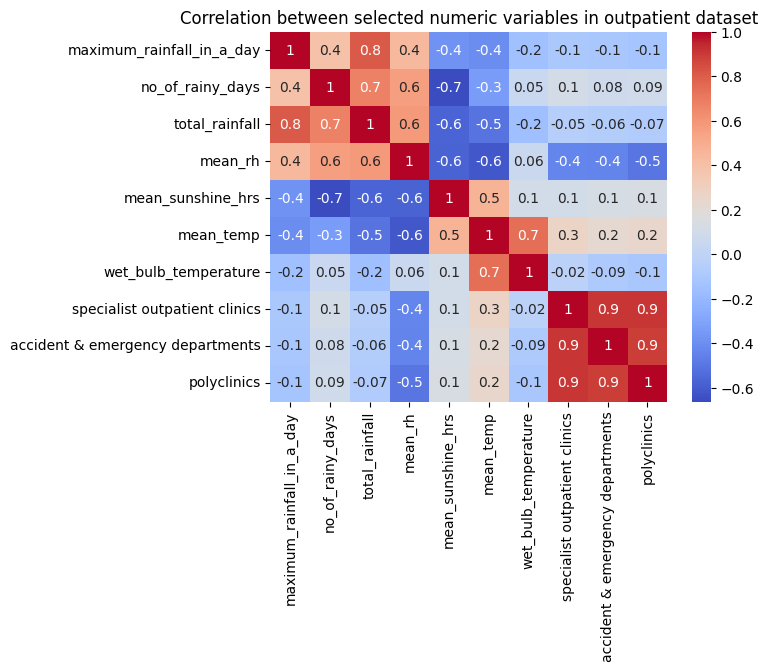

In [31]:
climate_columns = ['maximum_rainfall_in_a_day', 'no_of_rainy_days','total_rainfall', 'mean_rh', 'mean_sunshine_hrs', 'mean_temp','wet_bulb_temperature']
healthcare_columns = ['specialist outpatient clinics', 'accident & emergency departments', 'polyclinics']

subset_df = df[climate_columns + healthcare_columns]
sns.heatmap(subset_df.corr(), annot=True, fmt='.1g', cmap='coolwarm')
plt.title('Correlation between selected numeric variables in outpatient dataset')
plt.show()

Conclusion: Based on the above heatmap, observe that mean_temp (Air Surface Temperature) has the corelation with the count of attendance to healthcare facilities.

In [32]:
# function to visualize histogram
def visualize_histogram(df, titles):
    num_plots = len(df.columns)
    num_rows = int(np.ceil(num_plots / 3))
    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 15))
    axes = axes.ravel()
    
    for i, column in enumerate(df.columns):
        ax = axes[i]
        df[column].hist(ax=ax, bins=20)
        ax.set_title(titles[i])
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
        ax.axvline(x=df[column].mean(), c='k')
        if i+1 == num_plots and (i-1) % 3 == 0:
            fig.delaxes(axes[i+1])
# Display the plot
    plt.show()

In [33]:
df.columns

Index(['month', 'maximum_rainfall_in_a_day', 'no_of_rainy_days',
       'total_rainfall', 'mean_rh', 'mean_sunshine_hrs', 'mean_temp',
       'wet_bulb_temperature', 'date', 'year', 'specialist outpatient clinics',
       'accident & emergency departments', 'polyclinics'],
      dtype='object')

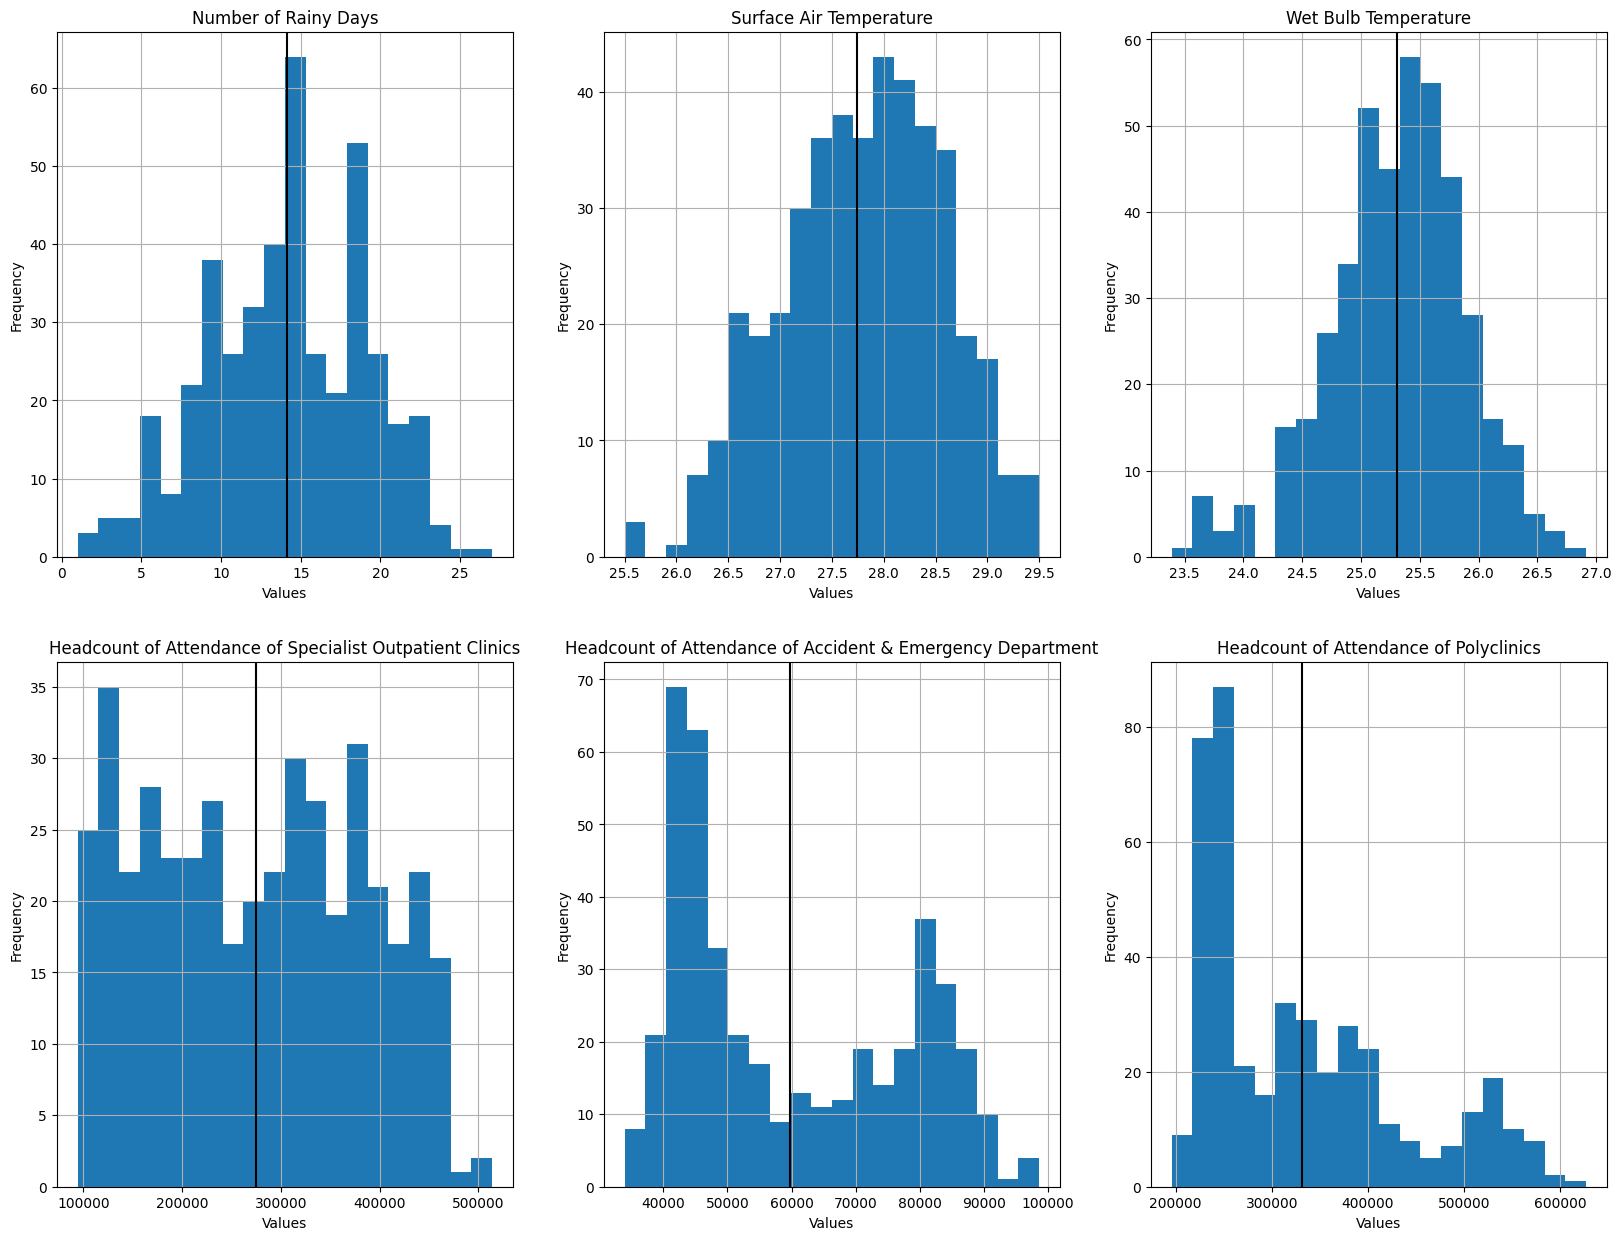

In [34]:
#extract column from df
df_hist_columns = df[['no_of_rainy_days','mean_temp','wet_bulb_temperature','specialist outpatient clinics', 'accident & emergency departments', 'polyclinics']]
title_df_hist_columns = ['Number of Rainy Days', 'Surface Air Temperature', 'Wet Bulb Temperature','Headcount of Attendance of Specialist Outpatient Clinics', 'Headcount of Attendance of Accident & Emergency Department','Headcount of Attendance of Polyclinics']
visualize_histogram(df_hist_columns, title_df_hist_columns)

The number of rainy days, mean surface air temperature and wet bulb temperature are normal distributed based on the above histogram.
For specialist outpatient clinics, seem like data is scattered from 100_000 to 450_000.
For accident & emergency department and polyclinics, seem like data is skewed to the left.

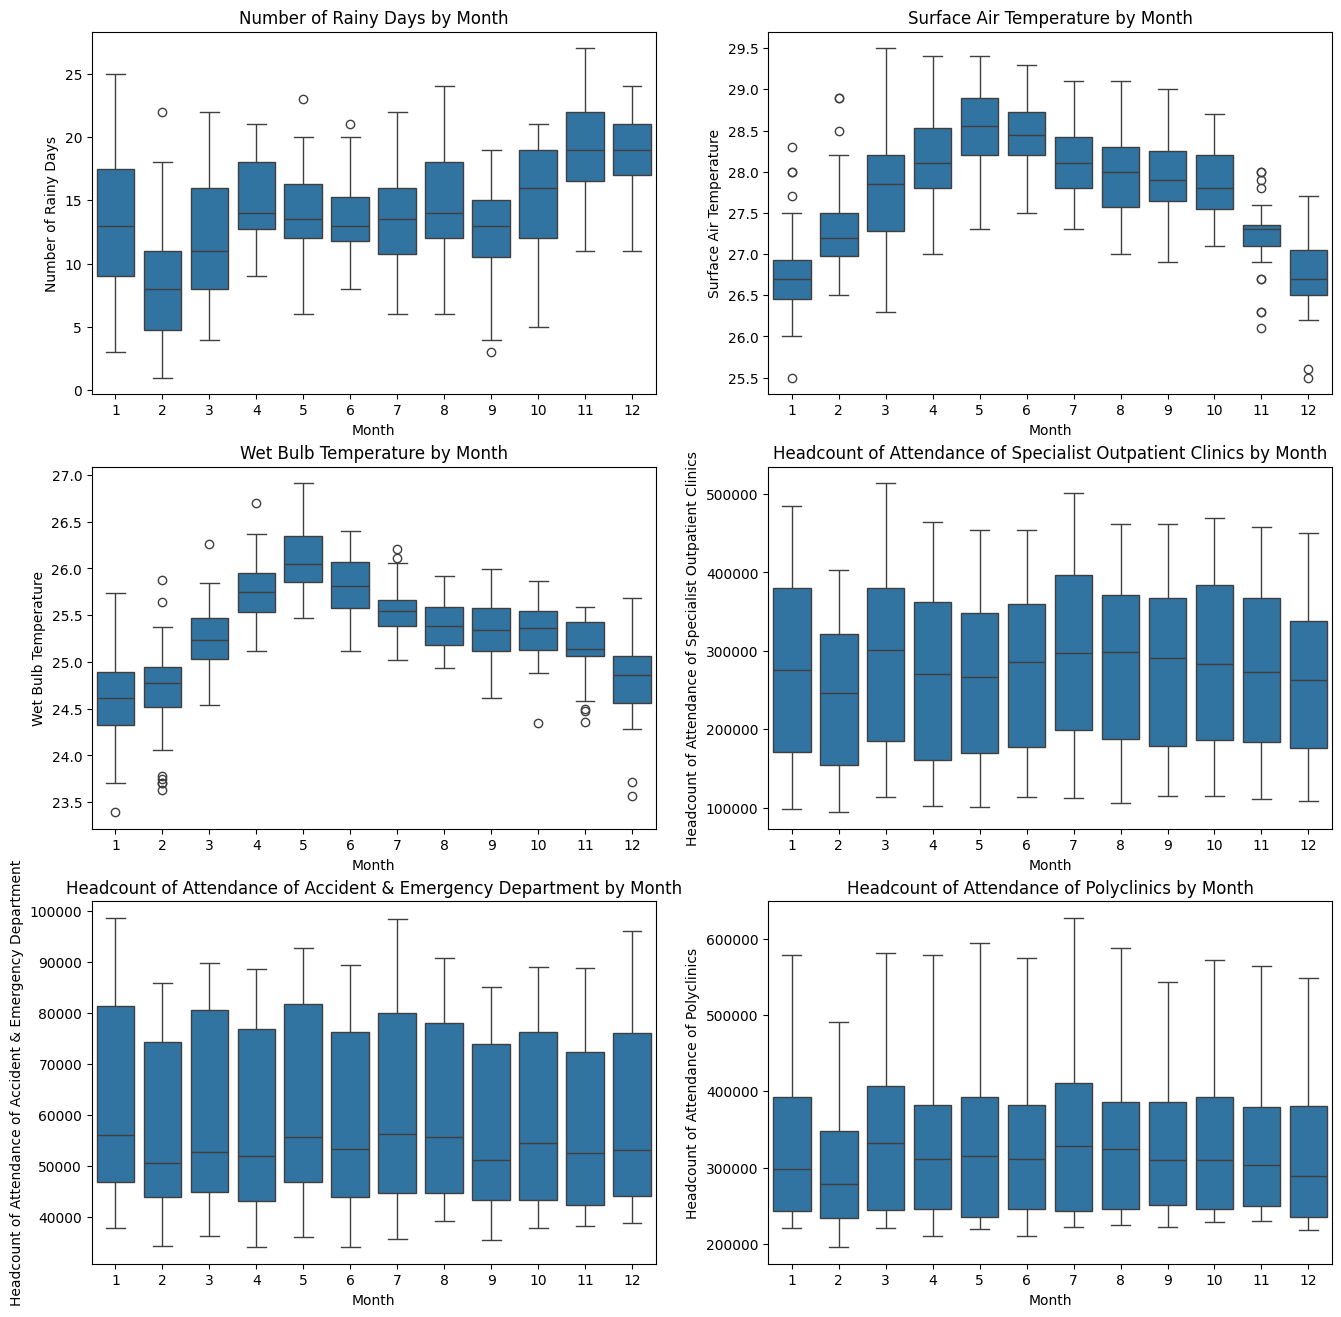

In [35]:
# Plotting boxplots for each column in the weather dataset grouped by month
title_df_boxplot_columns = ['Number of Rainy Days by Month', 'Surface Air Temperature by Month', 'Wet Bulb Temperature by Month','Headcount of Attendance of Specialist Outpatient Clinics by Month', 'Headcount of Attendance of Accident & Emergency Department by Month','Headcount of Attendance of Polyclinics by Month']
df_boxplot_columns = ['no_of_rainy_days','mean_temp','wet_bulb_temperature','specialist outpatient clinics', 'accident & emergency departments', 'polyclinics']
y_labels = ['Number of Rainy Days', 'Surface Air Temperature', 'Wet Bulb Temperature','Headcount of Attendance of Specialist Outpatient Clinics', 'Headcount of Attendance of Accident & Emergency Department','Headcount of Attendance of Polyclinics']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,16))

for i, column in enumerate(df_boxplot_columns):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=df, x='month', y=column, ax=ax)
    ax.set_title(title_df_boxplot_columns[i])
    ax.set(xlabel='Month', ylabel = y_labels[i])
plt.show()

From the boxplots above, can observe the surface air temperature and wet bulb temperture shows significant relavance as the pattern are similar.

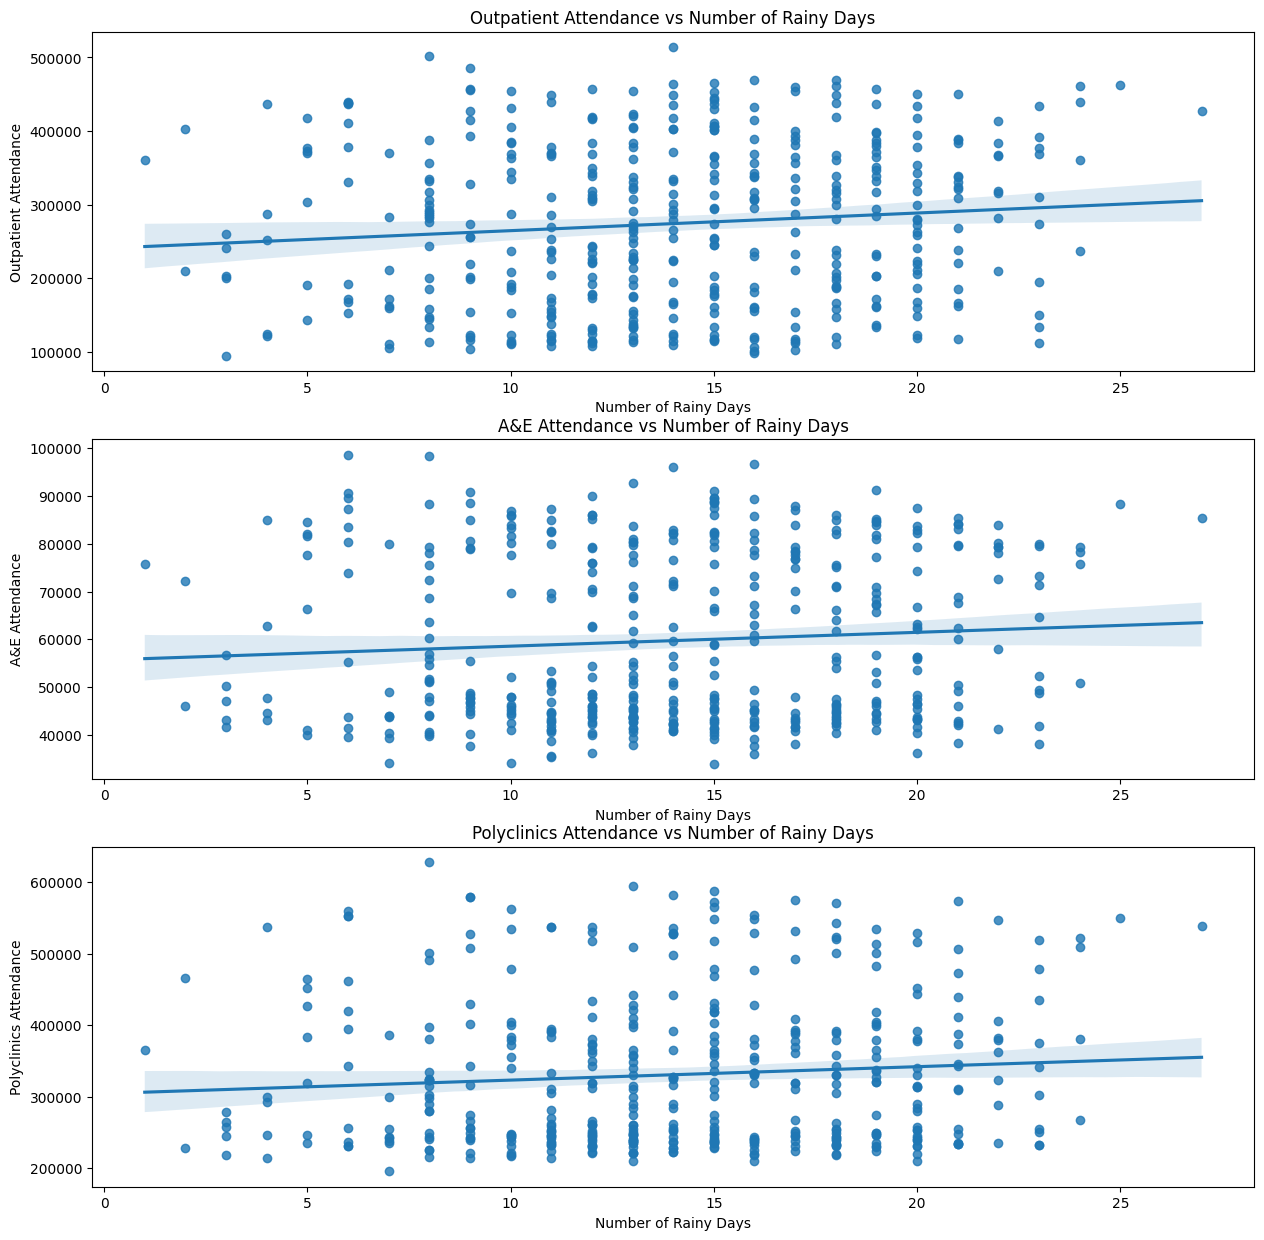

In [36]:
# Creating 3 scatter plots to observe the correlation coefficients
xlist = ['no_of_rainy_days', 'no_of_rainy_days', 'no_of_rainy_days']
ylist = ['specialist outpatient clinics', 'accident & emergency departments', 'polyclinics']
titles = ['Outpatient Attendance vs Number of Rainy Days', 'A&E Attendance vs Number of Rainy Days', 'Polyclinics Attendance vs Number of Rainy Days']
xlabel = ['Number of Rainy Days', 'Number of Rainy Days', 'Number of Rainy Days']
ylabel = ['Outpatient Attendance', 'A&E Attendance', 'Polyclinics Attendance']
fig, axes = plt.subplots(3, 1, figsize=(15,15))
for i, (x, y) in enumerate(zip(xlist, ylist)):
    sns.regplot(data=df, x=x, y=y, ax=axes[i])
    axes[i].set(xlabel=xlabel[i], ylabel=ylabel[i], title=titles[i])
plt.show()

From the scatter plots, we can see there are correlation between the attendance of healthcare facilites and number of rainy days in month.

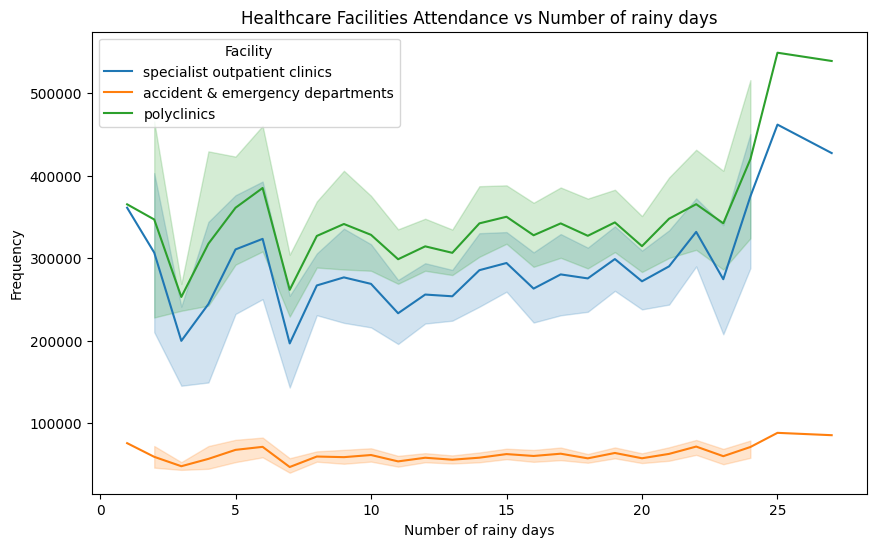

In [37]:
# Creating a single line plot to observe the frequency of attendance for all three healthcare facilities
x = 'no_of_rainy_days'
ylist = ['specialist outpatient clinics', 'accident & emergency departments', 'polyclinics']
titles = 'Healthcare Facilities Attendance vs Number of rainy days'
xlabel = 'Number of rainy days'
ylabel = 'Frequency'

plt.figure(figsize=(10, 6))

for y in ylist:
    sns.lineplot(data=df, x=x, y=y, label=y)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(titles)
plt.legend(title='Facility')
plt.show()

From the line graph, we can see 25 days have the highest attendance of healthcare facilities.

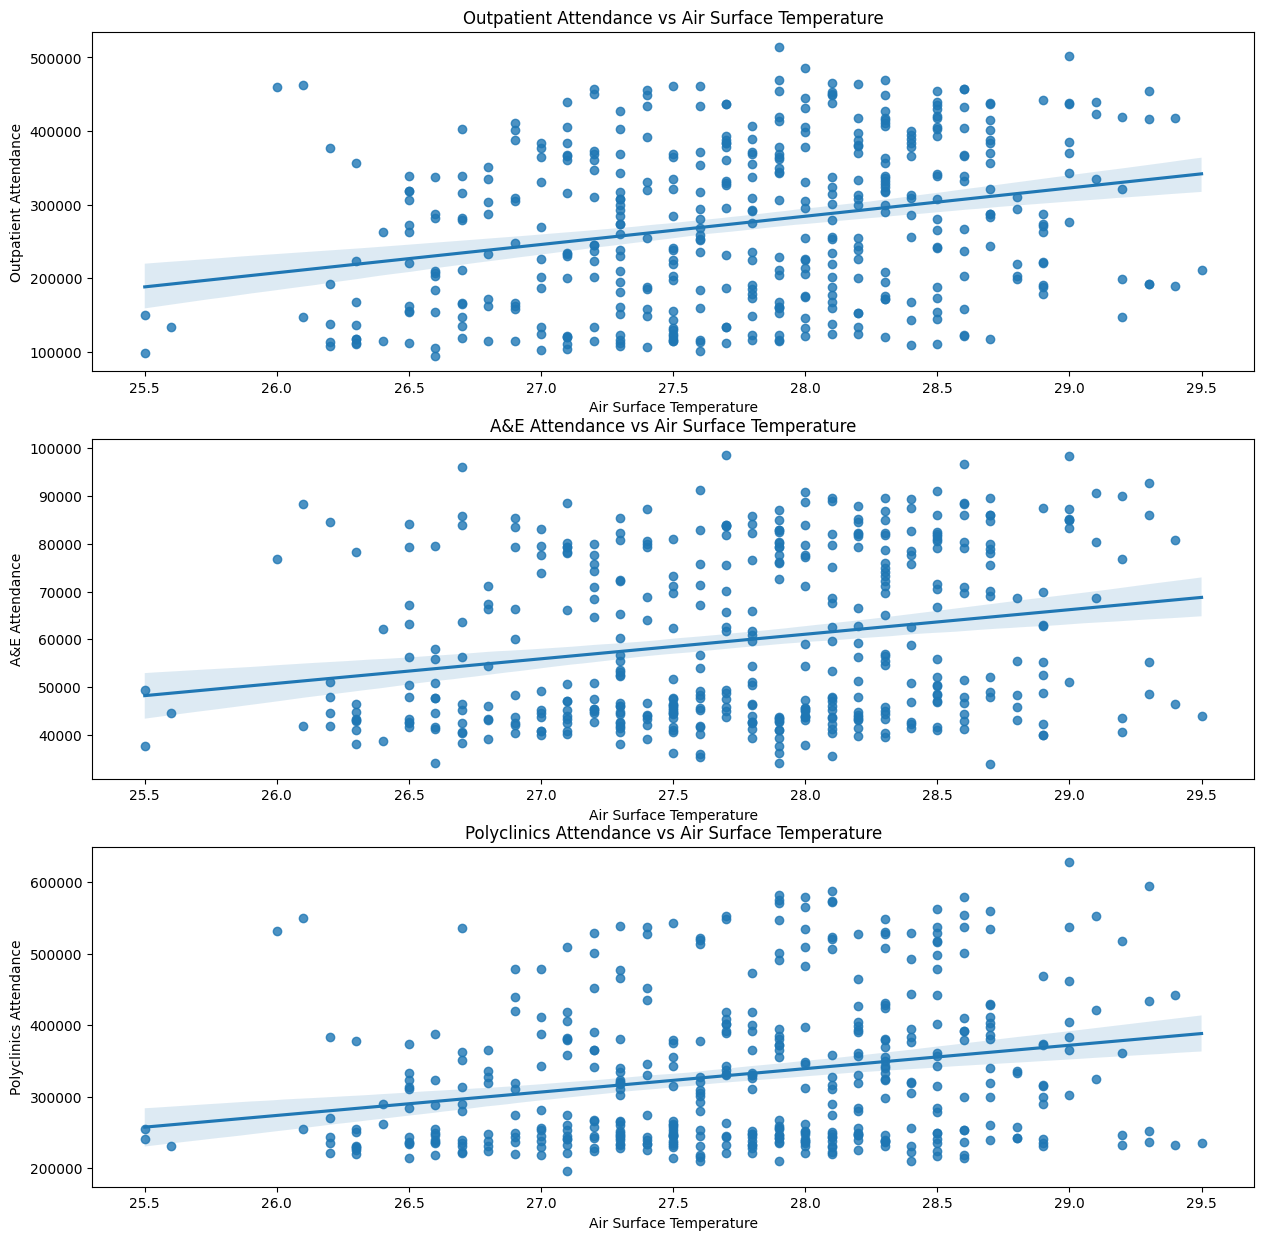

In [38]:
# Creating 3 scatter plots to observe the correlation coefficients
xlist = ['mean_temp', 'mean_temp', 'mean_temp']
ylist = ['specialist outpatient clinics', 'accident & emergency departments', 'polyclinics']
titles = ['Outpatient Attendance vs Air Surface Temperature', 'A&E Attendance vs Air Surface Temperature', 'Polyclinics Attendance vs Air Surface Temperature']
xlabel = ['Air Surface Temperature', 'Air Surface Temperature', 'Air Surface Temperature']
ylabel = ['Outpatient Attendance', 'A&E Attendance', 'Polyclinics Attendance']
fig, axes = plt.subplots(3, 1, figsize=(15,15))
for i, (x, y) in enumerate(zip(xlist, ylist)):
    sns.regplot(data=df, x=x, y=y, ax=axes[i])
    axes[i].set(xlabel=xlabel[i], ylabel=ylabel[i], title=titles[i])
plt.show()

From the scatter plots, we can see there are correlation between the attendance of healthcare facilites and air surface temperature.

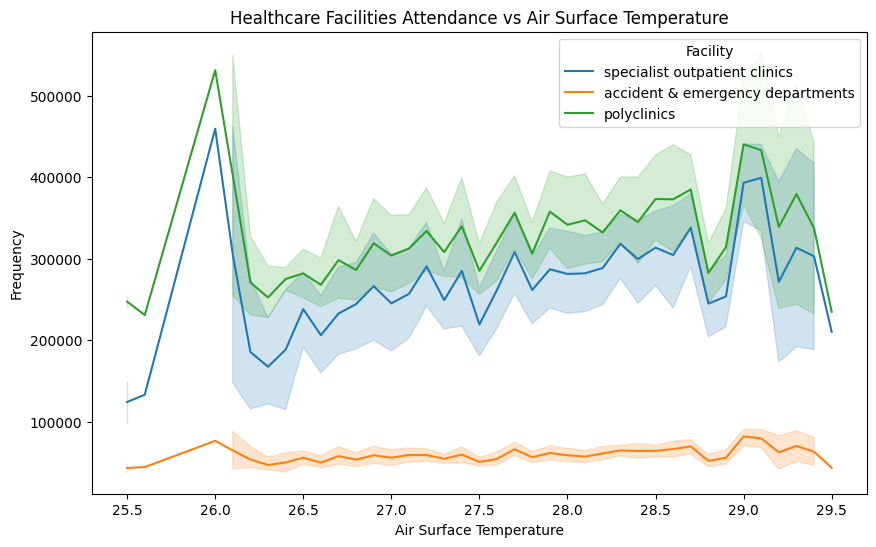

In [39]:
# Creating a single line plot to observe the frequency of attendance for all three healthcare facilities
x = 'mean_temp'
ylist = ['specialist outpatient clinics', 'accident & emergency departments', 'polyclinics']
titles = 'Healthcare Facilities Attendance vs Air Surface Temperature'
xlabel = 'Air Surface Temperature'
ylabel = 'Frequency'

plt.figure(figsize=(10, 6))

for y in ylist:
    sns.lineplot(data=df, x=x, y=y, label=y)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(titles)
plt.legend(title='Facility')
plt.show()

From the line graph, we can see at around 26 degrees have the highest attendance of healthcare facilities

## Conclusions and Recommendations

1. The correlation between number of rainy day and attendance of healthcare facilities are weak positive.
2. The correlation between air surface temperature and attendance of healthcare facilities are weak positive.
3. November and December have the highest number of rainy days.
4. May has the highest surface air temperature.
5. The months of May, November and December require more healthcare manpower, operating hour of the healthcare facilities and providing healthcare awareness to public.



